In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

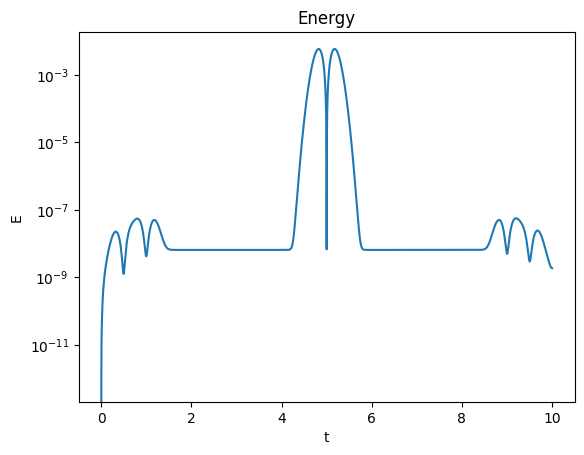

In [3]:
df = pd.read_csv("config/data/output.csv")

fig, ax = plt.subplots()
ax.plot(df["t"], np.abs(df["E"] - df["E"].iloc[0]))
ax.set_yscale("log")
ax.set_title("Energy")
ax.set_xlabel("t")
ax.set_ylabel("E")
plt.show()

In [4]:
file = h5py.File("config/data/data.h5")

In [5]:
# select keys start with "level"
keys = filter(lambda x: x.startswith("level"), list(file.keys()))
max_level = max(map(lambda x: int(x[5:]), keys))
max_level

3

(np.float64(-5.003), np.float64(5.003))
(np.float64(-5.0015), np.float64(-3.994))
(np.float64(-5.00075), np.float64(-4.497))


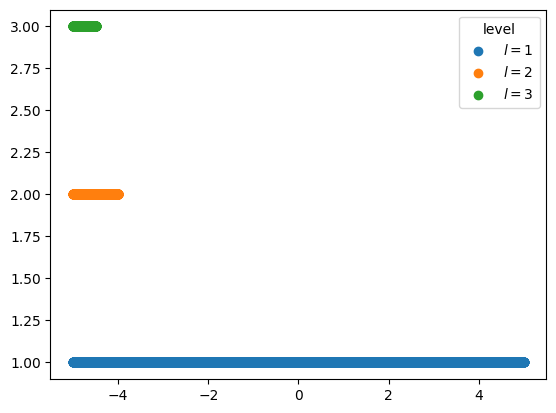

In [6]:
# plot grid
fig, ax = plt.subplots()


def lpad(x, width):
    return str(x).zfill(width)


for l in range(1, max_level + 1):
    x = file[f"level{lpad(l, 2, '0')}"][f"x"]
    y = np.zeros_like(x)
    y[:] = l
    print((x[0], x[-1]))
    ax.scatter(
        x,
        y,
        label=f"$l = {l}$",
    )

ax.legend(title="level")

In [7]:
# psi = amp * exp(-((x - x0) / sig)^2)
# amp=1.0, sig=0.25, x0=0.0

def gaussian(x, t, amp=1.0, sig=0.25, x0=0.0):
    # For the 1D wave equation, the solution at time t is:
    # u(x,t) = (f(x-ct) + f(x+ct))/2 where f is the initial condition
    # For a Gaussian initial condition, this gives:
    return (amp/2) * (np.exp(-((x - x0 - t)/sig)**2) + np.exp(-((x - x0 + t)/sig)**2))

Text(0.5, 1.0, 't = 7.000000000002809')

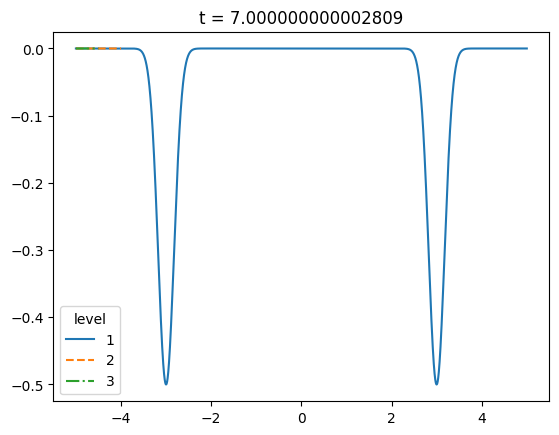

In [14]:
t = file['level01']['t'][:, 0]
t_target = 7
tidx = np.argmin(np.abs(t - t_target))

fig, ax = plt.subplots()

linestyles = ["-", "--", "-.", ":"]

for l in range(1, max_level + 1):
    level = file[f"level{lpad(l, 2, '0')}"]
    x = level["x"][()]
    state = level["state"][tidx, 0, :]
    state_true = gaussian(x, t_target)
    ax.plot(x, state, label=f"${l}$", linestyle=linestyles[l-1])

ax.legend(title="level")
ax.set_title(f"t = {t[tidx]}")